# Import and settings

To run this notebook, install R and glmnet and set up a PATH to Rscript.exe.

In this example, we need to import numpy, and scipy in addition to lingam.

In [1]:
import lingam

import numpy as np
import scipy

from lingam.utils import make_dot, predict_adaptive_logistic_regression
import matplotlib.pyplot as plt

np.set_printoptions(precision=3, suppress=True)
print([np.__version__, scipy.__version__, lingam.__version__])

np.random.seed(100)

['1.23.5', '1.10.1', '1.8.1']


# Test data
Test data is generated by this adjacency matrix.

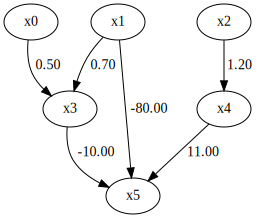

In [2]:
m = np.array([
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.5, 0.7, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 1.2, 0.0, 0.0, 0.0],
    [0.0,-80.0, 0.0,-10.0,11.0, 0.0],
])

make_dot(m)

x0 to x4 are explanatory variables. x5 is a discrete variable and is the objective variable.

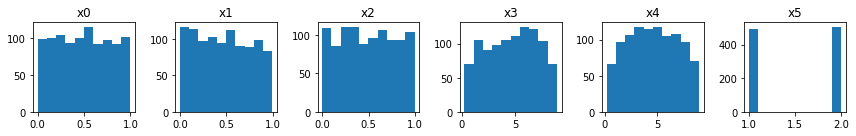

In [3]:
sample_num=1000

x0 = np.random.uniform(size=sample_num)
x1 = np.random.uniform(size=sample_num)
x2 = np.random.uniform(size=sample_num)
x3 = 0.5 * x0 + 0.7 * x1 + np.random.uniform(0, 8, size=sample_num)
x4 = 1.2 * x2 + np.random.uniform(0, 8, size=sample_num)

p5 = scipy.special.expit(-80 * x1 - 10.0 * x3 + 11 * x4 + 35)

x5 = []
for p in p5:
    x5.append(np.random.choice([1, 2], p=[p, 1 - p]))

X = np.vstack([x0, x1, x2, x3, x4, x5]).T

fig, axes = plt.subplots(1, X.shape[1], figsize=(12, 2))
for i, data in enumerate(X.T):
    axes[i].hist(data)
    axes[i].set_title(f"x{i}")
plt.tight_layout()
plt.show()

# Estimation
The strength of regularization can be specified by gamma.

In [4]:
predictor_indices = [0, 1, 2, 3, 4]
target_index = 5

coef = predict_adaptive_logistic_regression(X, predictor_indices, target_index, gamma=0.01)
coef

array([[ 0.   , 52.178, -0.476,  6.476, -7.209]])

The larger gamma, the stronger the regularization. x0 and x2, which are not directly related to x5, have coefficients of 0.

In [5]:
coef = predict_adaptive_logistic_regression(X, predictor_indices, target_index, gamma=1)
coef

array([[  0.  ,  75.46,   0.  ,   9.37, -10.45]])